# Daub 5/3 integer-to-integer system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [2]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D

In [3]:
f = np.random.randint(low=-10, high=11, size=8)

## Прямое преобразование

In [4]:
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [5]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

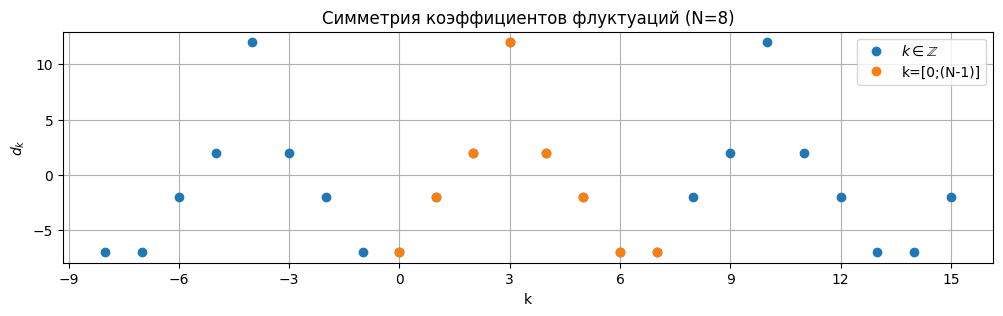

In [6]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

In [7]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [-8.5, 6.75, 7.0, -1.5]
d [-7.0, -2.0, 2.0, 12.0]


## Обратное преобразование

In [8]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print(f)
print(f_rec)
print(f-f_rec)

[-5 -5  9  6  7  3 -5  7]
[-5.0, -5.0, 9.0, 6.0, 7.0, 3.0, -5.0, 7.0]
[0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [9]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)

Wavelet coefficients: [-8.5, 6.75, 7.0, -1.5, -7.0, -2.0, 2.0, 12.0]
Reconstruction: [-5.0, -5.0, 9.0, 6.0, 7.0, 3.0, -5.0, 7.0]
Original: [-5 -5  9  6  7  3 -5  7]


In [10]:
np.round(Mdir)

matrix([[ 1.,  0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  0.,  1.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  1.,  0.],
        [-0.,  1., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  1., -0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  1., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [11]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[-8.5, 6.75, 7.0, -1.5, -7.0, -2.0, 2.0, 12.0]
[-8, 7, 7, -1, -7, -2, 2, 12]


Обратное преобразование, также по lifting-схеме.

In [12]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(f_int)

[-5.0, -5.0, 9.0, 6.0, 7.0, 3.0, -5.0, 7.0]
[-5, -5, 9, 6, 7, 3, -5, 7]


In [13]:
for k in range(20):
    print(int(k/4+1/2), (k+2)//4)

0 0
0 0
1 1
1 1
1 1
1 1
2 2
2 2
2 2
2 2
3 3
3 3
3 3
3 3
4 4
4 4
4 4
4 4
5 5
5 5


In [14]:
g = np.random.randint(low=-10, high=11, size=8*8).reshape(8,8)
g

array([[ -9,  -4,   9,  -7,   4,  10,   7,  -5],
       [ 10,  10,   8,  10,  -3, -10,   1,   0],
       [ -8,  10,   5,   5,  -4,   8,   7,   2],
       [  8,  -7,  -3,   9,  -8,   4,  -8,   4],
       [ -6,   6,  -4, -10,  -7,   3,   8,   2],
       [ -9,  -1,   1,   5,  -2,   2,   6,   0],
       [  4,  -4,  -8,  -1,   8,  -8,  -6,   3],
       [  0,  -4,   6,  -8,  -8,  -3,   6,   8]])

In [15]:
print(daub_5_3_lift_2D(g, int_flag=True))

[[ -3   3 -10   6  -7  -7  -2   2]
 [  3  -9   6  -6  -2  -1  -9   9]
 [ -7   3  -1   5   3   5   0  -6]
 [  0  -2  -8   7  11  -5   2  -6]
 [  3  -2  -1  -2 -10  14  12  12]
 [ -2   9  -1   7  11   4   6  -5]
 [ 11  10  -3  -1   1   7  -9  -1]
 [-11   5   2   5  -4 -14   4 -12]]
[[-22  -5   5   6  -5 -21  13 -11]
 [ -9   5   1   8  15  -7   4 -11]
 [  2  -3  -7   5  14 -15  -4  -9]
 [  8 -12  11 -12   0   0  -8  11]
 [  3  10  -1   3   4   0  -5  -6]
 [  1  -1  -2   1  -3   9  12   7]
 [ -4  -1   0   3   7   1  -3  -5]
 [  1  -3  -4   0  -7  -7  -6   8]]


In [16]:
print(daub_5_3_lift_2D(g, int_flag=False))

[[ -3   2 -10   6  -7  -7  -2   2]
 [  3  -8   5  -6  -2  -1  -9   9]
 [ -7   3   0   4   3   5   0  -6]
 [  0  -2  -7   7  11  -4   2  -6]
 [  3  -1  -1  -2  -9  14  12  12]
 [ -2   9  -1   7  11   4   6  -5]
 [ 10  10  -3  -1   1   7  -9  -1]
 [-11   4   1   5  -4 -13   4 -12]]
[[-21  -6   4   6  -5 -20  13 -11]
 [ -8   4   1   8  15  -6   4 -10]
 [  2  -3  -6   6  14 -13  -4  -9]
 [  8 -10  10 -11   0   0  -8  11]
 [  2   9  -1   2   3   0  -4  -6]
 [  1   0  -2   1  -1   9  12   7]
 [ -4   0   0   2   6   1  -3  -5]
 [  1  -3  -5   0  -7  -7  -6   7]]
